### Actividad: Predicción del Precio de Automóviles
### Nombres: Jesús Alejandro Toral Iñiguez

#### Objetivo: 
El propósito de esta actividad es que los alumnos, trabajando en parejas, practiquen y se familiaricen con el proceso completo para modelar una regresión lineal simple, desde la carga de datos hasta la interpretación de resultados, con el fin de predecir el precio de automóviles en función de su año de fabricación. 

#### Intrucciones:

1. Descarga del Dataset: Descarga el dataset [Car Price Prediction](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) de Kaggle. Las columnas de dataset son:
-  `name`
-  `year`
-  `selling_price`
-  `km_driven`
-  `fuel`
-  `seller_type`
-  `transmission`
-  `Owner`

Carguen los datos en un DataFrame de Pandas y realicen:  
    - Análisis de estructura (dimensiones, tipos de datos)  
    - Detección y tratamiento de valores nulos/inconsistentes  
    - Limpieza y transformación de datos cuando sea necesario  

2. Selección y Análisis de Variables:  
    - Evalúen la correlación entre variables utilizando Matrices de correlación  
    - Justifiquen la selección de variables para el modelo

3. Desarrollo del Modelo Predictivo:  
    - Verifiquen el supuesto de linealidad entre variables a través de un gráfico
    - Dividan el dataset (80% entrenamiento - 20% prueba) considerando una semilla para que los datos proporcionados sean los mismo cada vez que ejecuto el código.
    - Entrenen el modelo de regresión lineal.
    - Usen el modelo para hacer predicciones en los datos de prueba.

4. Visualización y Interpretación:  
    - Generen un gráfico de dispersión profesional que incluya:  
        * Puntos de datos reales  
        * Línea de regresión  
        * Etiquetas claras y leyenda  

  ##### Análisis del Modelo:

    1. ¿Qué relación cuantitativa existe entre el año de fabricación y el precio según el coeficiente β₁?

    El coeficiente indica que conforme los años van avanzando, el precio de los carros aumenta. 


    2. ¿Identifican algún patrón no lineal que sugiera la necesidad de otro tipo de modelo?

    El aumento de los precios no es en sí lineal, sino polinomial de segundo grado. Esto puede observarse en los gráficos. 



    3. ¿Qué tendencias se pueden obtener del modelo considerando las variables utilizadas?

    Pueden observarse cambios importantes en lo siguiente: 

    La relación entre el tiempo y el precio del vehículo. 
    Tasa de cambio en el precio la cual parece ser que cada vez aumenta más.
    También se puede predecir el valor de un carro en un año en específico. 





In [ ]:
#Importar bibliotecas 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1. Cargando los datos a un DF

car_df = pd.read_csv("Data/cardata.csv")

#1.2. Análisis de estructura (dimensiones, tipos de datos)  
car_df.info()
display(car_df.head(10))


#1.3. Detección y tratamiento de valores nulos/inconsistentes 
display(car_df.isnull().sum())


# Los datos no tienen a suficiente coorelacion para merecer el cambio
'''
#1.4 cambiando valores a numericos para su analisis

#1.4.1 Cambiando fuel 

 fuel_type = car_df["fuel"].unique() 
print(fuel_type)

fuel_map = {
    fuel_type[0]: 0,
    fuel_type[1]: 1,
    fuel_type[2]: 2,
    fuel_type[3]: 3,
    fuel_type[4]: 4
} 
car_df["fuel"] = car_df["fuel"].map(fuel_map) 


# 1.4.2 Cambiando seller_type 

seller = car_df["seller_type"].unique()
print(len(seller))

seller_map = {
    seller[0]: 0,
    seller[1]: 1,
    seller[2]: 2
}
car_df["seller_type"] = car_df["seller_type"].map(seller_map) 



#1.4.3 Cambiando owners
owners = car_df["owner"].unique()
print("Los owners unicos son: ",owners)
owners_map={
    owners[0]: 1,
    owners[1]: 2,
    owners[2]: 3,
    owners[3]: 4,
    owners[4]: 5,
}

car_df["owner"] = car_df["owner"].map(owners_map) 
'''





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

'\n#1.4 cambiando valores a numericos para su analisis\n\n#1.4.1 Cambiando fuel \n\n fuel_type = car_df["fuel"].unique() \nprint(fuel_type)\n\nfuel_map = {\n    fuel_type[0]: 0,\n    fuel_type[1]: 1,\n    fuel_type[2]: 2,\n    fuel_type[3]: 3,\n    fuel_type[4]: 4\n} \ncar_df["fuel"] = car_df["fuel"].map(fuel_map) \n\n\n# 1.4.2 Cambiando seller_type \n\nseller = car_df["seller_type"].unique()\nprint(len(seller))\n\nseller_map = {\n    seller[0]: 0,\n    seller[1]: 1,\n    seller[2]: 2\n}\ncar_df["seller_type"] = car_df["seller_type"].map(seller_map) \n\n\n\n#1.4.3 Cambiando owners\nowners = car_df["owner"].unique()\nprint("Los owners unicos son: ",owners)\nowners_map={\n    owners[0]: 1,\n    owners[1]: 2,\n    owners[2]: 3,\n    owners[3]: 4,\n    owners[4]: 5,\n}\n\ncar_df["owner"] = car_df["owner"].map(owners_map) \n'

In [1]:
#2 Seleccion y Analisis de Variables

#2.1 Evalúen la correlación entre variables utilizando Matrices de correlación 
corr_mat = car_df.corr(numeric_only = True)
filt_corr = corr_mat[(corr_mat > 0.4) & (corr_mat < 1)]
display(filt_corr)

#2.2 Justifiquen la selección de variables para el modelo
'''
Se usara year como variable independiente
y selling_price como variable dependiente
esto ya que el paso de los años no se ven afectados por el precio de los vehiculos 
'''

NameError: name 'car_df' is not defined

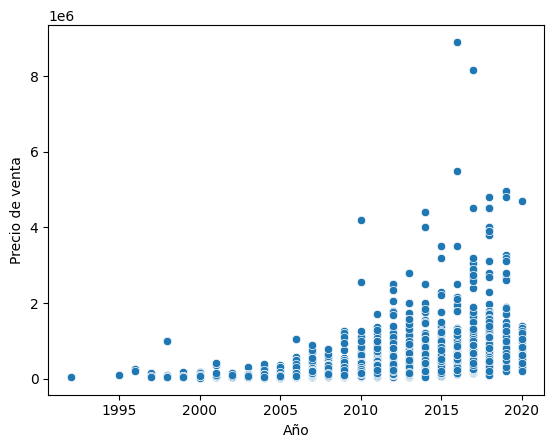

El precio de un carro de 2010  es  de 881812.65 dolares


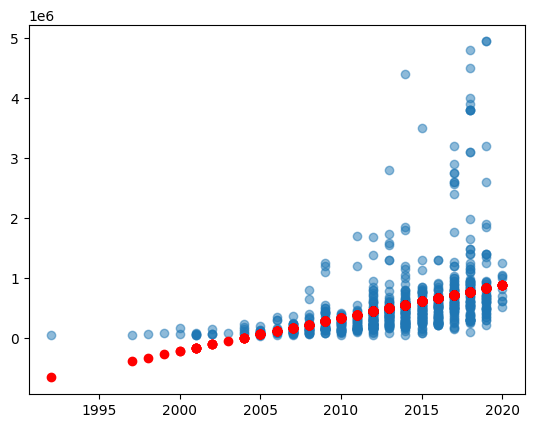

In [ ]:
#3 Desarrollo del Modelo Predictivo:

x = car_df["year"]
y = car_df["selling_price"]

#3.1 Verifiquen el supuesto de linealidad entre variables a través de un gráfico
sns.scatterplot(car_df,x="year",y="selling_price")
plt.ylabel("Precio de venta")
plt.xlabel("Año")
plt.show()

# 3.2 Dividan el dataset (80% entrenamiento - 20% prueba) 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=21)

# 3.3 Entrenen el modelo de regresión lineal.

model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

# 3.4 Usen el modelo para hacer predicciones en los datos de prueba.
y_pred = model.predict(x_test.values.reshape(-1, 1))
prediction = model.predict(np.array([[2020]]))[0][0]
print(f"El precio de un carro de 2010  es  de {prediction:.2f} dolares")


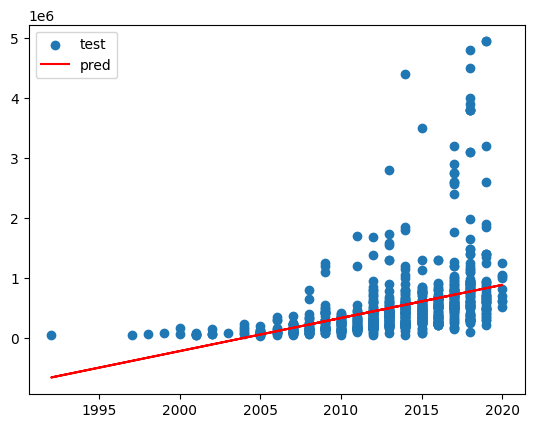

In [ ]:
#4. Visualización e Interpretación:  

#4.1 Puntos de datos reales
plt.scatter(x_test,y_test,label="test")
#4.2 Línea de regresión
plt.plot(x_test,y_pred,label="pred",color="r")

plt.legend()
plt.show()

